In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X, y = make_blobs(n_samples=1000, random_state=5)

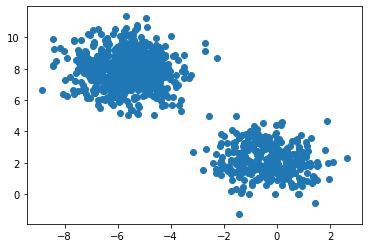

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [20]:
class KMeansCustom:
    
    
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        n_inits = 5
        
        jobs = []

        for init in range(n_inits):
            
            cluster_centers = X[np.random.randint(0, len(X), self.n_clusters)]
        
            for step in range(10):

                vote = []
                error = 0

                for point in X:
                    distances = np.sum((cluster_centers - point) ** 2, axis=1) ** .5
                    vote.append(distances.argmin())
                    error += distances[distances.argmin()]

                npvote = np.array(vote)

                for i in range(self.n_clusters):
                    cluster_centers[i] = (X[npvote == i]).mean(axis=0)
            
            jobs.append([error, cluster_centers, npvote])
        
        idx = np.array([job[0] for job in jobs]).argmin()
        
        error, cluster_centers, npvote = jobs[idx]
        
        self.labels_ = npvote
        self.cluster_centers_ = cluster_centers


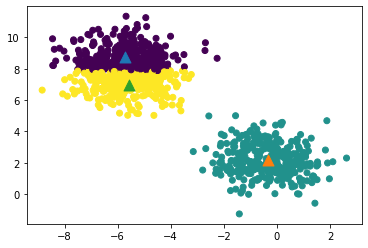

In [23]:
model = KMeansCustom(3)

model.fit(X)


plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    [xi, yi] = center
    plt.scatter(xi, yi, s=120, marker="^")

array([[-0.74692053,  2.06709853],
       [-5.4744165 ,  8.75091073],
       [-5.33374729,  8.2137764 ],
       [-5.96765574,  6.60202136],
       [-7.11814291,  8.64302616]])